<div dir="ltr" style="text-align: left;" trbidi="on">
<h2 style="text-align: left;">
100 Days of ML Day 62</h2>
<h3 style="text-align: left;">
HackerEarth Airplane Accident Severity Challenge Part 2</h3>
Improved the score and rank in the Airplane Accident Severity 
Classification Challenge on Hackerearth, after understanding the data 
better, doing better preprocessing and finding sweet spot of model 
parameters. Jumped from rank 330 (94.3 percentile) to 104 (98.2 
percentile) on the leaderboard. <br />
<br />
Code: <a href="https://github.com/hithesh111/Hith100/blob/master/100Days/day062.ipynb">https://github.com/hithesh111/Hith100/blob/master/100Days/day062.ipynb</a><br />
<br />
Competition: <a href="https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/">https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/</a><br />
<br />
Leaderboard: <a href="https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/leaderboard/how-severe-can-an-airplane-accident-be-03e7a3f1/">https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/leaderboard/how-severe-can-an-airplane-accident-be-03e7a3f1/</a></div>


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
df = pd.read_csv('/home/hithesh/Downloads/Airplane Data/train.csv')
df['Height_Temp']=df['Max_Elevation']-400*df['Cabin_Temperature']
# print(df.count())
print(df.head())
print(df.columns)

                                  Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.32260

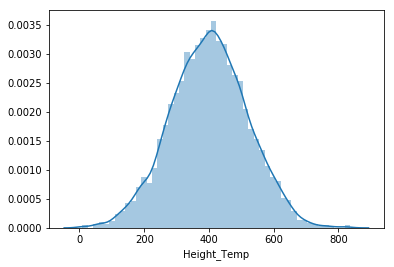

In [3]:
df['Height_Temp']=df['Max_Elevation']/df['Cabin_Temperature']
sns.distplot(df['Height_Temp'])

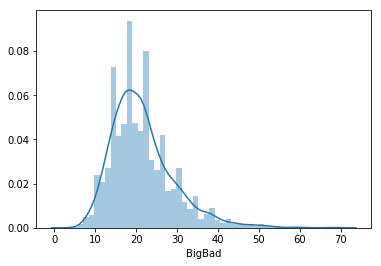

In [4]:
df['BigBad'] = df['Total_Safety_Complaints'] + df['Violations'] + df['Days_Since_Inspection']
sns.distplot(df['BigBad'])

41.87640639269426 48.41421457042206


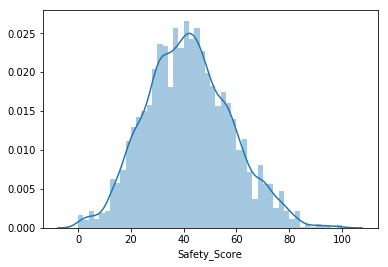

In [5]:
factor=3
print(df['Safety_Score'].mean(),df['Safety_Score'].std()*factor)
sns.distplot(df['Safety_Score'])

32001.803282224242 28295.985587519644


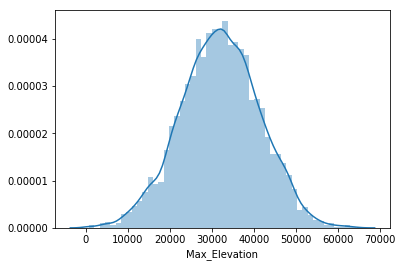

In [6]:
factor=3
print(df['Max_Elevation'].mean(),df['Max_Elevation'].std()*factor)
sns.distplot(df['Max_Elevation'])

0.2556347899282224 1.524512146363575


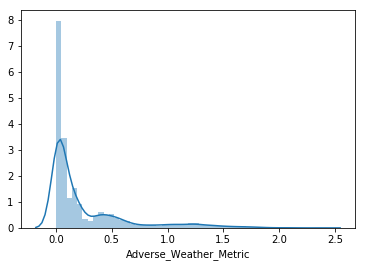

In [7]:
factor=4
print(df['Adverse_Weather_Metric'].mean(),df['Adverse_Weather_Metric'].std()*factor)
sns.distplot(df['Adverse_Weather_Metric'])

In [8]:
# sns.scatterplot(df['Adverse_Weather_Metric'],df['Severity'])

0.3814949873782929 0.42455283784663456


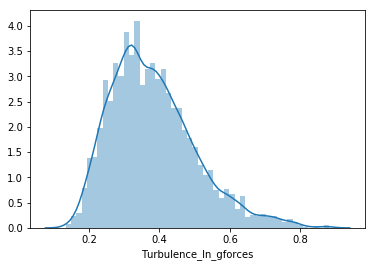

In [9]:
factor=3.5
print(df['Turbulence_In_gforces'].mean(),df['Turbulence_In_gforces'].std()*factor)
sns.distplot(df['Turbulence_In_gforces'])

65.14532360984533 29.707336207277557


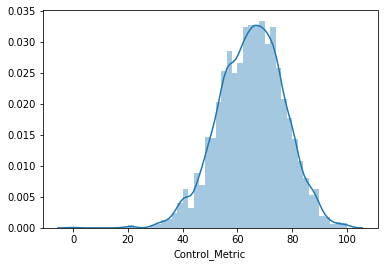

In [10]:
factor=2.5
print(df['Control_Metric'].mean(),df['Control_Metric'].std()*factor)
sns.distplot(df['Control_Metric'])

In [11]:
def outliercap(df,colname,factor):
    factor = 3
    upper_lim = df[colname].mean () + df[colname].std () * factor
    lower_lim = df[colname].mean () - df[colname].std () * factor
    # df = df[(df['Safety_Score'] < upper_lim) & (df['Safety_Score'] > lower_lim)]
    df.loc[(df[colname] > upper_lim),colname] = upper_lim
    df.loc[(df[colname] < lower_lim),colname] = lower_lim

# factor=3
# upper_lim = df['Safety_Score'].mean () + df['Safety_Score'].std () * factor
# lower_lim = df['Safety_Score'].mean () - df['Safety_Score'].std () * factor
# # df = df[(df['Max_Elevation'] < upper_lim) & (df['Max_Elevation'] > lower_lim)]
# df.loc[(df['Safety_Score'] > upper_lim),'Safety_Score'] = upper_lim
# df.loc[(df['Safety_Score'] < lower_lim),'Safety_Score'] = lower_lim

    
# factor=3
# upper_lim = df['Max_Elevation'].mean () + df['Max_Elevation'].std () * factor
# lower_lim = df['Max_Elevation'].mean () - df['Max_Elevation'].std () * factor
# # df = df[(df['Max_Elevation'] < upper_lim) & (df['Max_Elevation'] > lower_lim)]
# df.loc[(df['Max_Elevation'] > upper_lim),'Max_Elevation'] = upper_lim
# df.loc[(df['Max_Elevation'] < lower_lim),'Max_Elevation'] = lower_lim

# factor=3
# upper_lim = df['Control_Metric'].mean () + df['Control_Metric'].std () * factor
# lower_lim = df['Control_Metric'].mean () - df['Control_Metric'].std () * factor
# # df = df[(df['Control_Metric'] < upper_lim) & (df['Control_Metric'] > lower_lim)]
# df.loc[(df['Control_Metric'] > upper_lim),'Control_Metric'] = upper_lim
# df.loc[(df['Control_Metric'] < lower_lim),'Control_Metric'] = lower_lim

# factor=3
# upper_lim = df['Turbulence_In_gforces'].mean () + df['Turbulence_In_gforces'].std () * factor
# lower_lim = df['Turbulence_In_gforces'].mean () - df['Turbulence_In_gforces'].std () * factor
# #   = df[(df['Turbulence_In_gforces'] < upper_lim) & (df['Turbulence_In_gforces'] > lower_lim)]
# df.loc[(df['Turbulence_In_gforces'] > upper_lim),'Turbulence_In_gforces'] = upper_lim
# df.loc[(df['Turbulence_In_gforces'] < lower_lim),'Turbulence_In_gforces'] = lower_lim

# print(df.count())

In [12]:
print(df['Severity'].unique())
print((df['Severity']==df['Severity'].unique()[0]).count())
print((df['Severity']==df['Severity'].unique()[1]).count())
print((df['Severity']==df['Severity'].unique()[2]).count())
print((df['Severity']==df['Severity'].unique()[3]).count())

['Minor_Damage_And_Injuries' 'Significant_Damage_And_Fatalities'
 'Significant_Damage_And_Serious_Injuries' 'Highly_Fatal_And_Damaging']
10000
10000
10000
10000


In [13]:
max_tscore=0
max_cscore=0
print([df.columns[2],df.columns[3],df.columns[9]])
for p in range(43,44,1):
    df = pd.read_csv('/home/hithesh/Downloads/Airplane Data/train.csv')
    factor = p/10
    outliercap(df,'Safety_Score',factor)
    outliercap(df,'Max_Elevation',factor)
    outliercap(df,'Control_Metric',factor)
    outliercap(df,'Turbulence_In_gforces',factor)
    
    features = df.columns
    features = features.drop(['Severity'])
    for o in range(6,7):
        for n in range(7,8):
            for m in range(40,41):
                for l in range(75,76):
                    for k in range(7,8):
                        for j in range(1):
                            features.drop([df.columns[2],df.columns[3],df.columns[9]])
                            X = df[features]

                            LE = LabelEncoder()
                            LE.fit(df['Severity'])
                            y = LE.transform(df['Severity'])
                            for i in range(5):
                                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                        #         model = RandomForestClassifier(n_estimators = 100)
                        #         model = RandomForestClassifier(min_samples_split = 20, n_estimators = 100)
                                model = GradientBoostingClassifier(n_estimators=400,learning_rate=l/100,max_depth=k,min_samples_split=m,max_features = n,min_samples_leaf=o)
                        #         model = GradientBoostingClassifier(min_samples_split=20)
                                multi = OneVsRestClassifier(model)
                                multi.fit(X_train,y_train)

                                train_score=((multi.predict(X_train) - y_train) == 0).sum()*100/len(y_train)
                                cv_score=((multi.predict(X_test) - y_test) == 0).sum()*100/len(y_test)
                                if(train_score>max_tscore):
                                    max_tscore = train_score
                                    max_tindex = k,l,m,n,o,p
                                    print('tBetter')
                                if(cv_score>max_cscore):
                                    max_cscore = cv_score
                                    max_cindex = k,l,m,n,o,p
                                    bestmodel = multi
                                    print('cBetter')
                                print(k,l,m,n,o,p,'\nTrain_Score:',train_score)
                                print('CV_Score:',cv_score)
                                print('Best till now:', max_cindex, max_cscore,'\n')
print(max_cindex)

['Days_Since_Inspection', 'Total_Safety_Complaints', 'Violations']
tBetter
cBetter
7 75 40 7 6 43 
Train_Score: 100.0
CV_Score: 96.1
Best till now: (7, 75, 40, 7, 6, 43) 96.1 

7 75 40 7 6 43 
Train_Score: 100.0
CV_Score: 95.65
Best till now: (7, 75, 40, 7, 6, 43) 96.1 

7 75 40 7 6 43 
Train_Score: 100.0
CV_Score: 95.9
Best till now: (7, 75, 40, 7, 6, 43) 96.1 

7 75 40 7 6 43 
Train_Score: 96.3875
CV_Score: 91.3
Best till now: (7, 75, 40, 7, 6, 43) 96.1 

7 75 40 7 6 43 
Train_Score: 100.0
CV_Score: 96.05
Best till now: (7, 75, 40, 7, 6, 43) 96.1 

(7, 75, 40, 7, 6, 43)


In [14]:
bestmodel.fit(X,y)

OneVsRestClassifier(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.75, loss='deviance', max_depth=7,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=6, min_samples...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          n_jobs=None)

In [15]:
df2 = pd.read_csv('/home/hithesh/Downloads/Airplane Data/test.csv')
acc_id = df2['Accident_ID']
features = df2.columns

features.drop([df2.columns[2],df2.columns[3],df2.columns[9]])
X = df2[features]

pred = bestmodel.predict(X)
df2['Severity'] = pd.Series(LE.inverse_transform(pred))

final = pd.concat([acc_id,df2['Severity']],axis=1)
final.to_csv('PlaneSubmission.csv',header=True , index=False)